In [1]:
from matplotlib import pyplot as plt  #ploting할 때 쓰는 것, library -> sub library 
#Q. 똑같은 역할 하는 것 A. import matplotlib.pyplot

from mpl_toolkits.mplot3d import Axes3D
#3D function을 위한 용도

from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

puretone = sinusoidal(정현파)을 처리하는 것이 phasor
sinusoidal : having a regular smooth repeating pattern

# Phasor

#parameter setting  변수들 미리 설정!

In [2]:
amp = 30        # range [0.0, 1.0] : amplitude진폭
sr = 10000       # sampling rate, Hz : 음질, 얼마나 고음질로 할건지 정하는 것 / 시간과 관련된 것
dur = 0.5        # in seconds
freq = 440.0     # sine frequency, Hz  반복이 몇 번이 되는지

In [3]:
#generate phase
theta = np.arange(0, 2*np.pi, 0.1)# <- 그냥 이렇게 하면 0.1를 단위로  array 가 나온다.

In [4]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)

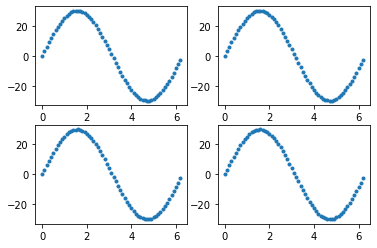

In [5]:
fig = plt.figure() #figure는 화면 전체를 말함
ax = fig.add_subplot(221)
ax.plot(theta, s, '.') # theta : x값 /  s :  sin을 통과시켜서 나온 output(y축)
ax = fig.add_subplot(222)
ax.plot(theta, s, '.') #2x2로 나누고 그 중에 두번째 것을 선택 (화면 분리를 해서 subplot을 만들 수 있다.)
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')

Text(0, 0.5, 'value')

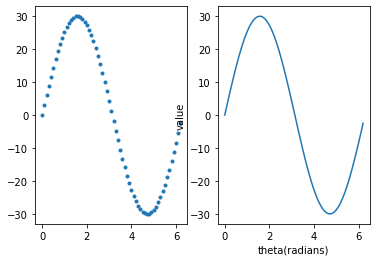

In [6]:
fig = plt.figure() 
ax = fig.add_subplot(121)
ax.plot(theta, s, '.')
ax = fig.add_subplot(122)
ax.plot(theta, s)  #<- line으로 된다
ax.set_xlabel('theta(radians)')
ax.set_ylabel('value')

linear하면 x축 한단위 ,y축 변화량이 같다 위의 그래프는 not linear

t 0.0001 0.0002 0.0003 ...........0.5000 이렇게 직접할 수 없으므로 밑에 식을 이용

generate time 중요!!!!! t는 time
sr 로 나누어주므로 time이 되는 것이다 
세타 각도값만으로는 소리를 만들 수 없다.

+1 은 마지막 것을 쓰지 않는 다는 것을 의미 
+1은 가장 마지막 것도 포함시키기 위한 것

In [7]:
t = np.arange(1, sr * dur+1)/sr

In [8]:
# generate phase
theta = t * 2*np.pi * freq   #time의 개념이 들어가게 됨

In [9]:
# generate signal by cosine-phasor
s = np.sin(theta)
#cos으로 해도 소리 변하지 않는다. sin으로 바꾸려면 pi/2 만큼 이동하면 된다. 
#그 각도를 phase라고 하는데 이것이 변화한다고 해서 소리가 달라진다고 느끼지 않는다.
#우리가 변화를 감지하는 부분은 frequency이다. 

Text(0, 0.5, 'real')

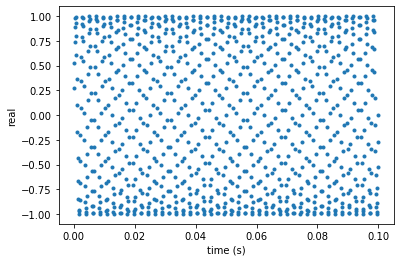

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') #부분만 추출해서 plotting하는 것
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

#아래 그래프에는 시간의 개념이 포함되어 있지 않다. > 소리를 만들어낼 수 없음
#아래 그래프의 해당하는 부분이 1초라면 ~~

In [11]:
# generate signal by complex-phasor
c = np.exp(theta*1j)  

#ij는 그냥 if라고 생각하면 편함

Text(0.5, 0, 'imag')

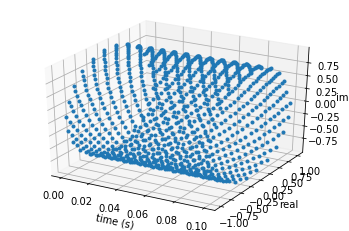

In [12]:
fig = plt.figure()  #function을 이용
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')  #복소수를 real imag 분리해서 지정
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

#real만 보기 : cos  
#imag : sin]

# 원의 반지름과 amplitude는 같다!!!!

In [15]:
#function (벡터,sampling rate)
#우리가 sin으로 만든 s
ipd.Audio(s, rate=sr)
#ipd.Audio(c.real, rate=sr)
#ipd.Audio(c.imag, rate=sr)

In [16]:
#!pip install sounddevice
import sounddevice as sd
sd.play(s.real, sr)

# Generate pulse train

Q.sampling rate가 100hz라 생각하면 우리가 표현할 수 있는 숫자의 개수가 1초에 100개이다.
100개의 숫자를 가지고 frequency를 1hz 를 표현할 수 있을까?
A. 표현 가능 한 개의 물결을 그리면 된다 (한 번 왔다갔다 하는)
1hz 2hz.... 10000hz는??
1초에 10000번 왔다갔다 하는 것은 불가능하다.

smpling rate가 충분히 있어야 그만큼의 주파수를 표현할 수 있다는 의미!!
 : 
sampling rate의 반절까지 frequency 표현 가능하다. : "Nyquist frequency"

ex1 ) cd 음질
sr = '44100Hz"
Nyquist frequency = '22050Hz

Q. 왜 cd음질은 44100일까
A. 사람의 가청 주파수가 20000이다

ex2 ) 옛날 유선전화 
sampling rate = 8000Hz
Nyquist frequency = 4000Hz    <- 이 정도 되면 어떤 말을 하는지까지는 구별이 되지만 누가 통화하는지 구별이 제대로 되지 않는다. 

최근 전화
sampling rate = 16000Hz
Nyquist frequency = 8000Hz

초음파  : 20000Hz보다 높은 소리!!! 소리를 나지만 우리가 듣지 못하는 것일뿐이다.



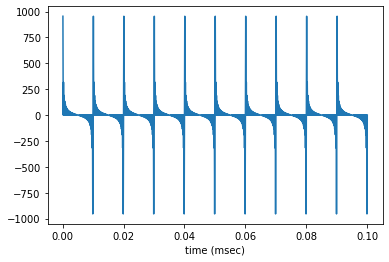

In [17]:
# generate samples, note conversion to float32 array
F0 = 100
Fend = int(sr/2)#sampling rate의 반절을 의미함 int는 반올림해서 정수값으로 만들기

s = np.zeros(len(t));

for freq in range(F0, Fend+1, F0): #제일 마지막 값도 포함시키기 위해서 100부터 5000까지 loop가 돌아간다.
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

이 그래프의 한 시점에서의 스펠트로그램을 잘라냈을 때

spectrum : 한 순간, 한 점에서 given time에서 표현
x축 freq, y축 amplitude

1. pure tone의 스펙트로그램을 보면 gradually decreasing
2. 산맥을 하나하나 만들어주기

밑의 값 메커니즘 이해하기, 각각 요소의 역할 이해하기

function을 만드는 과정
return이 출력하는 것

In [18]:
def hz2w(F, sr):   #F는 어떤 frequency
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):  #BW : bandwidth
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [19]:
RG = 0  # RG is the frequency of the Glottal Resonator 어느 지점에서 산맥 만들지 - 우리는 gradually decreasing을 만들고 있으므로 0이다
BWG = 100  # BWG is the bandwidth of the Glottal Resonator : 어떤 산을 만들 때 그 폭, 즉 산맥의 뾰족한 정도를 위미한다.
a, b=resonance(sr,RG,BWG)  #산맥의 위치
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

첫번째 소리보다 부드로운 소리가 나온다. 
다운로드 후 프랏에서 스펙트럼 비교해보기

In [21]:
#first ferment를 만드는 것
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [22]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [23]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [24]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

#여기까지가 입술이 없을 때 나는 소리이다. 

In [25]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

#위의 소리보다 더 큰 소리가 나온다. 우리가 평소 말하는 'ㅓ' 소리와 유사한 소리이다. 

# load wav

In [132]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [133]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

<IPython.core.display.Javascript object>


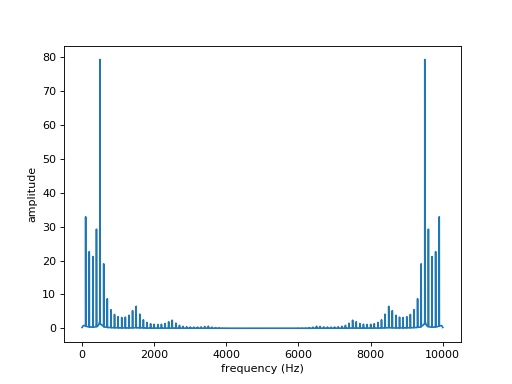

Text(0, 0.5, 'amplitude')

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [100]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [101]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

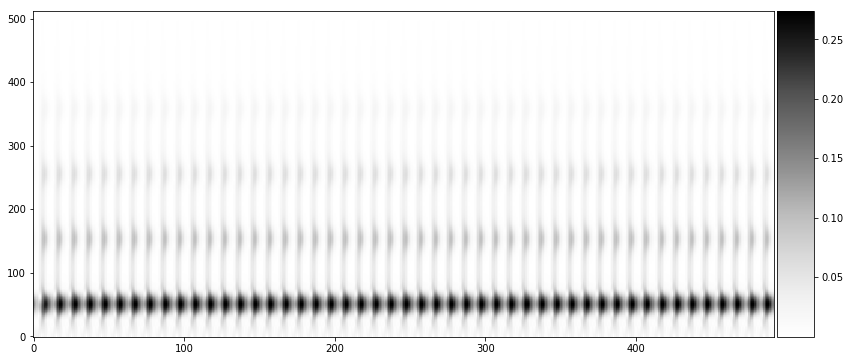

In [102]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

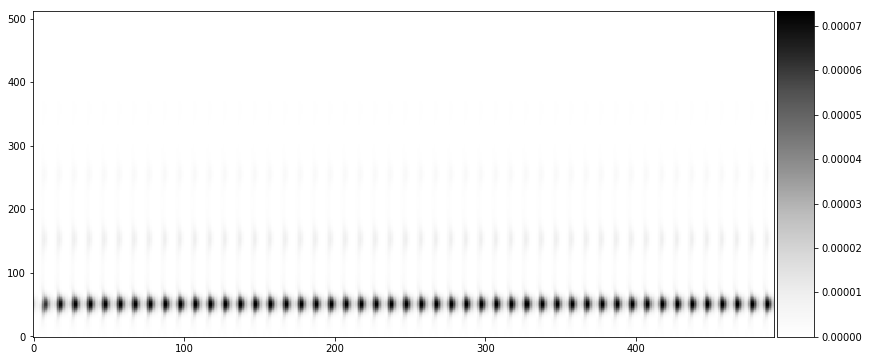

In [103]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

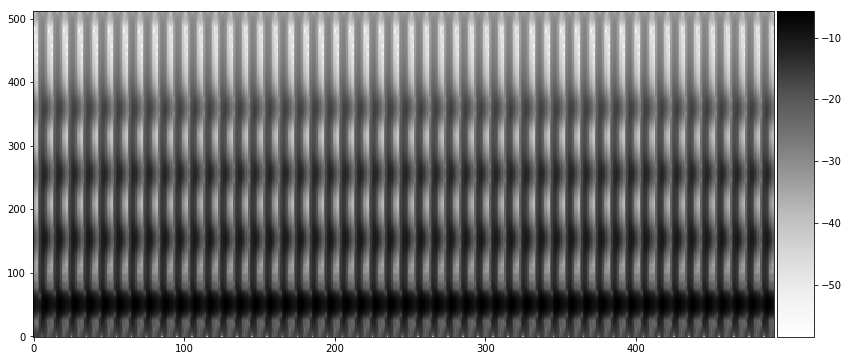

In [104]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

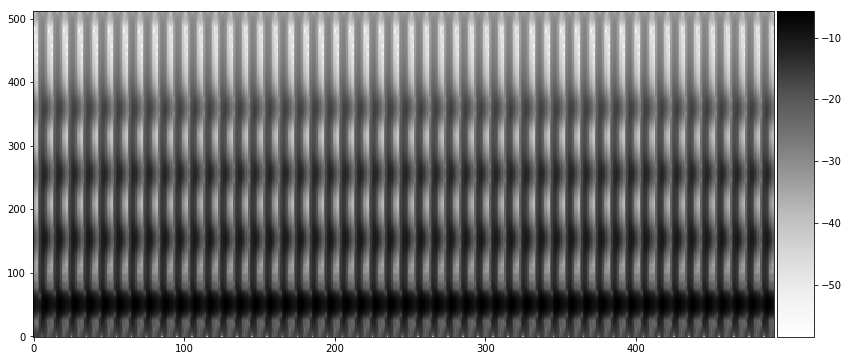

In [105]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);